In [145]:
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, ErrorCode, plotTrajectoriesFile,AdvectionRK4_3D
import numpy as np
import math
from datetime import timedelta
from operator import attrgetter
import netCDF4
import pandas
import os
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
%matplotlib inline

In [19]:
globfiles = ["/Users/hart-davis/Desktop/BIOSATLANTIC12-CNCRAD07A_y2007m12d31_gridU.nc"]
globfile = ["/Users/hart-davis/Desktop/BIOSATLANTIC12-CNCRAD07A_y2007m12d31_gridV.nc"]
glb = ["/Users/hart-davis/Desktop/BIOSATLANTIC12-CNCRAD07A_y2007m12d31_gridW.nc"]
tfiles = ["/Users/hart-davis/Desktop/BIOSATLANTIC12-CNCRAD07A_y2007m12d31_gridT.nc"]
filenames = {'U': globfiles,'V': globfile,'W': glb, "temp":tfiles}
variables = {'U': 'vozocrtx','V': 'vomecrty','W': 'vovecrtz', 'temp':'votemper'}
dimensions = {'lat': 'nav_lat','lon': 'nav_lon','time': 'time_counter','dep'}

fieldset = FieldSet.from_netcdf(filenames, variables, dimensions, allow_time_extrapolation=True)

fieldset.add_constant('dwellingdepth', 1000)
fieldset.add_constant('sinkspeed', 1000/3600)

def Sink(particle, fieldset, time, dt):
    if particle.depth > fieldset.dwellingdepth :
        particle.depth = particle.depth + fieldset.sinkspeed * dt
    else :
        particle.depth = fieldset.dwellingdepth

lonW = -10  #western part of deployment box
lonE = 10  #eastern part of deployment box
latS = -65 #southern part of deployment box
latN = -55 #northern part of deployment box
particles = 10 #number of particles one wants to deploy

lons, lats = np.meshgrid(np.arange(lonW, lonE, 2), np.arange(latS, latN,2))


pset = ParticleSet.from_list(fieldset=fieldset, pclass=JITParticle, lon=lons, lat=lats)
kernels = pset.Kernel(AdvectionRK4_3D) + Sink

os.remove("testing3.nc")
output_file = pset.ParticleFile(name="testing3")
pset.execute(AdvectionRK4, starttime=datetime(2008, 1, 1), runtime=timedelta(days=1000),
             dt=timedelta(minutes=5), interval=timedelta(hours=6),output_file=output_file)
nc = netCDF4.Dataset("testing3.nc")
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

ncd = netCDF4.Dataset('/Users/hart-davis/Desktop/BIOSATLANTIC12-CNCRAD07A_y2007m12d31_gridU.nc')
ncf = netCDF4.Dataset('/Users/hart-davis/Desktop/BIOSATLANTIC12-CNCRAD07A_y2007m12d31_gridV.nc')

lonx = ncd.variables["nav_lon"][:]
laty = ncd.variables["nav_lat"][:]
east = ncd.variables["vozocrtx"][0,0]
north = ncf.variables["vomecrty"][0,0]
figure1 = plt.figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

m = Basemap(projection = "merc", resolution="i",llcrnrlon = -70, 
            llcrnrlat = -70, urcrnrlon = 56, urcrnrlat = -29,lat_0= -20,lon_0 = 0)
f1,f2 = m(lon,lat)
for i in range(0,len(f1[0]-1)):
    m.scatter(f1[:,i],f2[:,i],1, marker = ".", alpha = 1, zorder=3)

x,y = m(lonx,laty)

speed = np.sqrt(np.square(east) + np.square(north))
#Blue=GC
#Red = Hycom
m.streamplot(x,y,east,north,color=speed,density=3, cmap=plt.cm.bone, linewidth=speed/2)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)

plt.show()

TypeError: int() argument must be a string or a number, not 'NoneType'

In [8]:
Sink()

<function __main__.Sink>

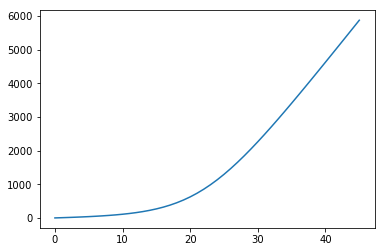

In [18]:
plt.show(plt.plot(deptht))

In [205]:
nc = netCDF4.Dataset("/Users/hart-davis/Downloads/OceanParcels-Parcelsv0.9Paper_Scripts/experiment_scripts/corefootprint_particles_array.nc")

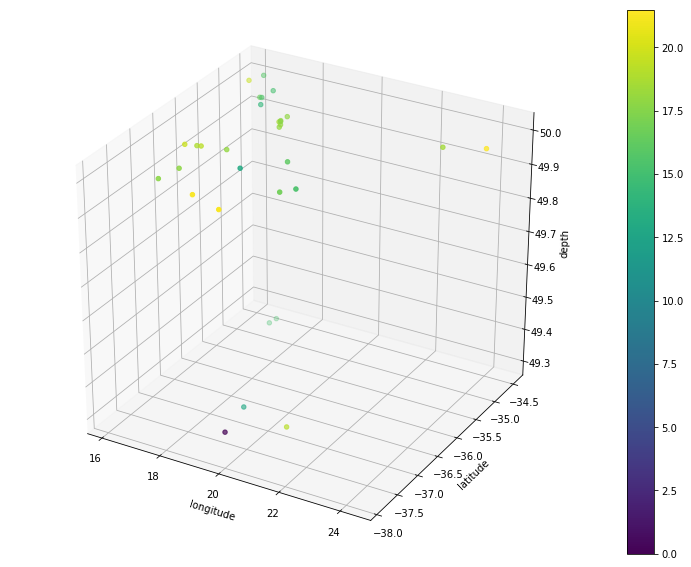

In [206]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')


x = nc.variables["lon"][:]
y = nc.variables["lat"][:]
z1 = nc.variables["z"][:]

c = nc.variables["temp"][:]

cb = ax.scatter(x[:], y[:], z1[:], c=c,s=20,marker="o")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_zlabel("depth")
plt.colorbar(cb)

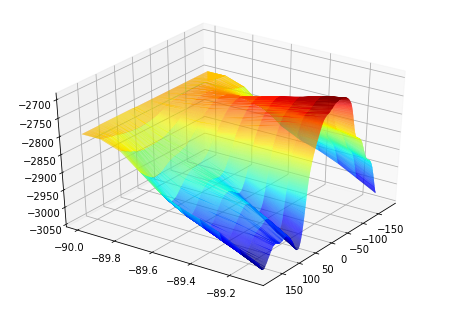

In [213]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)

globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

ncc = netCDF4.Dataset(globfiles)

ssh = ncc.variables["Height"][:,:]
lon = ncc.variables["lon"][:]
lat = ncc.variables["lat"][:]

a = np.where((lat >= -38) & (lat <=34))[0]
b = np.where((lon>=10) & (lon<=30))[0]

xx, yy = np.meshgrid(lon,lat)

ax.view_init(35, 35)
ax.plot_surface(xx[:10],yy[:10],-ssh[:10], rstride=1, cstride=1, cmap=cm.jet,linewidth=1, antialiased=True)
plt.show()

In [215]:
lon[b].shape


(200,)

In [201]:

xx, yy = np.meshgrid(lon,lat)

ax.plot_surface(xx[:10],yy[:10],ssh[:10], rstride=1, cstride=1, cmap=cm.jet,linewidth=1, antialiased=True)
plt.show()

In [131]:
xx[b].shape

IndexError: index 1900 is out of bounds for axis 0 with size 720

In [139]:
xx[0,:].shape

(200,)

In [110]:
ssh[index]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (720,) (200,) 